# Цель лабораторной работы: изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection  import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
dt=df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],axis=1)
dt.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,No


In [6]:
dt['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
df_rain=pd.get_dummies(dt)
df_rain.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM', 'RainTomorrow_No', 'RainTomorrow_Yes'],
      dtype='object')

In [8]:
df_rain.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_No,RainTomorrow_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0,1,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,1,0


In [9]:
df_rain['RainTomorrow_Yes'].value_counts()

0    110316
1     31877
Name: RainTomorrow_Yes, dtype: int64

In [10]:
data=df_rain.fillna(df_rain.mean())
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_No,RainTomorrow_Yes
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,1,0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,1,0
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,1,0
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1.0,1,0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,1,0
142189,2.8,23.4,0.0,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,1,0
142190,3.6,25.3,0.0,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,1,0
142191,5.4,26.9,0.0,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,1,0


In [11]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_No,RainTomorrow_Yes
MinTemp,1.000000,0.733919,0.103314,0.353698,0.051907,0.173331,0.174946,0.174187,-0.232372,0.005913,-0.424357,-0.434034,0.061460,0.015902,0.897999,0.699828,0.123928,-0.083717,0.083717
MaxTemp,0.733919,1.000000,-0.074202,0.442214,0.331505,0.066329,0.014586,0.050381,-0.499777,-0.499725,-0.309093,-0.397422,-0.226776,-0.214469,0.880087,0.969735,-0.044154,0.159087,-0.159087
Rainfall,0.103314,-0.074202,1.000000,-0.038186,-0.173011,0.127250,0.085977,0.056762,0.221392,0.249609,-0.159676,-0.120366,0.171613,0.145848,0.011384,-0.077553,0.301844,-0.236874,0.236874
Evaporation,0.353698,0.442214,-0.038186,1.000000,0.290375,0.147371,0.140669,0.094134,-0.377594,-0.289915,-0.211823,-0.231341,-0.152224,-0.147763,0.417323,0.429195,-0.031569,0.089551,-0.089551
Sunshine,0.051907,0.331505,-0.173011,0.290375,1.000000,-0.022479,0.005685,0.039471,-0.351980,-0.446849,0.030932,-0.015477,-0.537714,-0.559379,0.210174,0.349271,-0.222487,0.327029,-0.327029
WindGustSpeed,0.173331,0.066329,0.127250,0.147371,-0.022479,1.000000,0.577864,0.658377,-0.209272,-0.025822,-0.426600,-0.384642,0.052281,0.080202,0.146756,0.032274,0.156620,-0.225264,0.225264
WindSpeed9am,0.174946,0.014586,0.085977,0.140669,0.005685,0.577864,1.000000,0.513079,-0.269027,-0.030991,-0.215178,-0.165050,0.019171,0.041080,0.128769,0.005026,0.068828,-0.090524,0.090524
WindSpeed3pm,0.174187,0.050381,0.056762,0.094134,0.039471,0.658377,0.513079,1.000000,-0.144270,0.015789,-0.277495,-0.239743,0.041369,0.019803,0.162144,0.028443,0.048554,-0.086909,0.086909
Humidity9am,-0.232372,-0.499777,0.221392,-0.377594,-0.351980,-0.209272,-0.269027,-0.144270,1.000000,0.659852,0.131601,0.176168,0.354394,0.274613,-0.471137,-0.492430,0.170541,-0.255158,0.255158
Humidity3pm,0.005913,-0.499725,0.249609,-0.289915,-0.446849,-0.025822,-0.030991,0.015789,0.659852,1.000000,-0.025769,0.048566,0.400006,0.407898,-0.217593,-0.555777,0.306711,-0.439678,0.439678


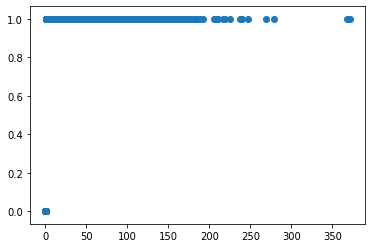

In [12]:
plt.scatter( x='RISK_MM', y='RainTomorrow_Yes', data=data);

In [13]:
y=data['RainTomorrow_Yes'].values
X=data.drop(['RainTomorrow_Yes'],axis=1).values
X

array([[13.4, 22.9,  0.6, ..., 21.8,  0. ,  1. ],
       [ 7.4, 25.1,  0. , ..., 24.3,  0. ,  1. ],
       [12.9, 25.7,  0. , ..., 23.2,  0. ,  1. ],
       ...,
       [ 3.6, 25.3,  0. , ..., 24.5,  0. ,  1. ],
       [ 5.4, 26.9,  0. , ..., 26.1,  0. ,  1. ],
       [ 7.8, 27. ,  0. , ..., 26. ,  0. ,  1. ]])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)
np.unique(X_train)

array([  -8.5,   -8.2,   -8. , ..., 1040.4, 1040.6, 1040.9])

In [15]:
np.unique(X_test)

array([  -7.5,   -7.2,   -7. , ..., 1040.4, 1040.5, 1041. ])

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn.score(X_test,y_test)

0.892892306249707

In [19]:
cross_val_score(knn,X_train,y_train,cv=5)

array([0.89265083, 0.89194756, 0.89877932, 0.89164615, 0.89099312])

In [20]:
np.mean(cross_val_score(knn,X_train,y_train,cv=5))

0.8932033957904254

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
knn_params = {'n_neighbors' : list(range(1,15))}

In [23]:
knn_grid = GridSearchCV(knn,knn_params,cv=5)

In [24]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
knn_grid.best_score_, knn_grid.best_params_

(0.8940473200381774, {'n_neighbors': 7})

## Лабораторная работа №5
### Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [27]:
first_tree = DecisionTreeClassifier(random_state=17)

In [28]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [29]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

1.0

In [30]:
tree_params = {'max_depth': np.arange(2, 11), 'max_features':[.5, .7, 1]}

In [31]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [32]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),

In [33]:
tree_grid.best_score_, tree_grid.best_params_

(1.0, {'max_depth': 2, 'max_features': 0.5})

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
tree_test_pred = tree_grid.predict(X_test)

In [36]:
accuracy_score(y_test, tree_test_pred)

1.0

In [37]:
from sklearn.tree import export_graphviz

In [38]:
second_tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
second_tree.score(X_test, y_test)

1.0

In [39]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

In [40]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
svc_pred = svc.predict(X_test)

In [43]:
cross_val_score(svc, X_train, y_train, cv=5)

array([0.77540564, 0.77545587, 0.77545587, 0.77555634, 0.77545587])

In [48]:
np.mean([0.77540564, 0.77545587, 0.77545587, 0.77555634, 0.77545587])

0.775465918

In [49]:
accuracy_score(y_test, svc_pred)

0.7771109756669323

In [50]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV

In [52]:
y_new = data['RainTomorrow_Yes'].values
X_new = data.drop('RainTomorrow_Yes', axis=1)

In [53]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(X_new_train,y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_new, y_new)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.6min remaining: 14.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.1min finished
C:\Users\Nikita Anurov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=1)

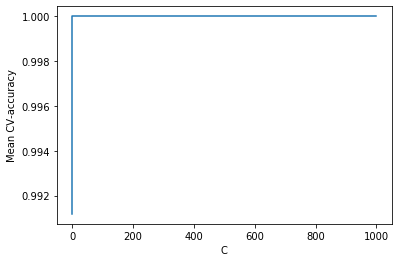

In [57]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');